### Zaman Serileri

In [93]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [94]:
data = pd.read_csv('avocado.csv')
df = data.copy()
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [95]:
df = df.drop(columns= ['Unnamed: 0'], axis= 1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [97]:
dates = [datetime.datetime.strptime(ts, "%Y-%m-%d") for ts in df['Date']]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in dates]
df['Date'] = pd.DataFrame({'Date':sorteddates})
df['Year'], df['Month'],  df['Day'] = df['Date'].str.split('-').str

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """


In [98]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
0,2015-01-04,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,01,04
1,2015-01-04,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,01,04
2,2015-01-04,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,01,04
3,2015-01-04,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,01,04
4,2015-01-04,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,01,04


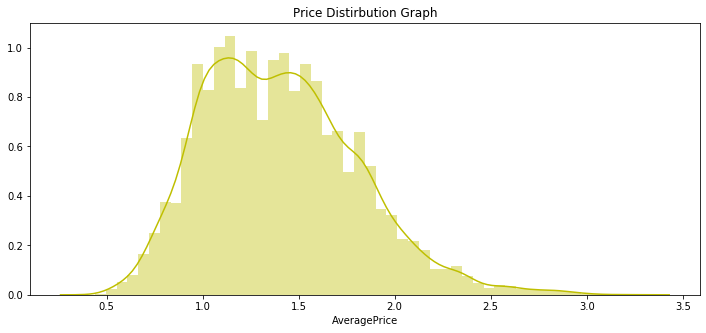

In [99]:
# Fiyatlar için Dağılım Grafiği

plt.figure(figsize= (12,5))
plt.title('Price Distirbution Graph')
sns.distplot(df['AveragePrice'], color= 'y');

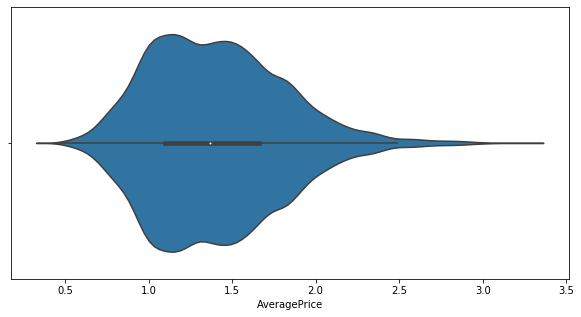

In [100]:
# Fiyatlar için Violin Grafiği

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(df.dropna(subset = ['AveragePrice']).AveragePrice);

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [102]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
0,2015-01-04,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,01,04
1,2015-01-04,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,01,04


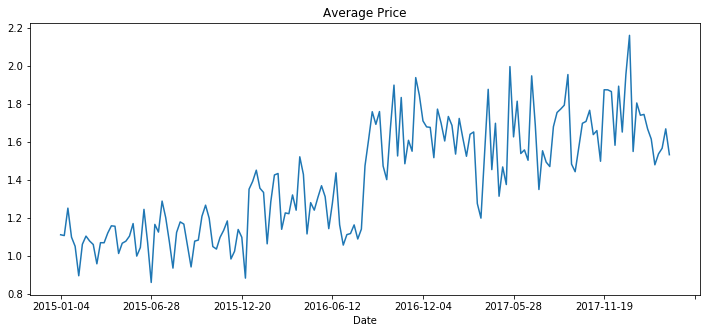

In [103]:
dategroup = df.groupby('Date').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x = df.Date)
plt.title('Average Price');

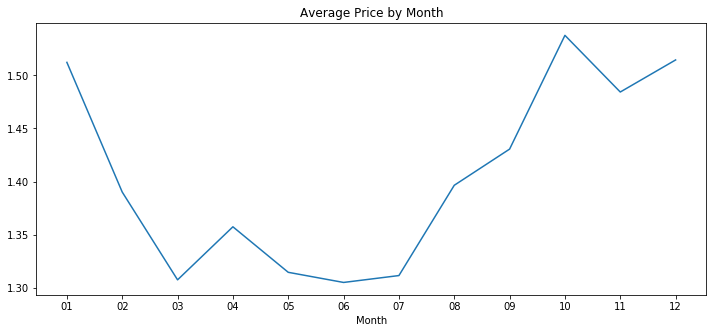

In [104]:
# Avokado Fiyatlarının Aylara Göre Değişimleri

dategroup = df.groupby('Month').mean()
fig, ax = plt.subplots(figsize = (12,5))
ax.xaxis.set(ticks = range(0,13))
dategroup['AveragePrice'].plot(x = df.Month)
plt.title('Average Price by Month');

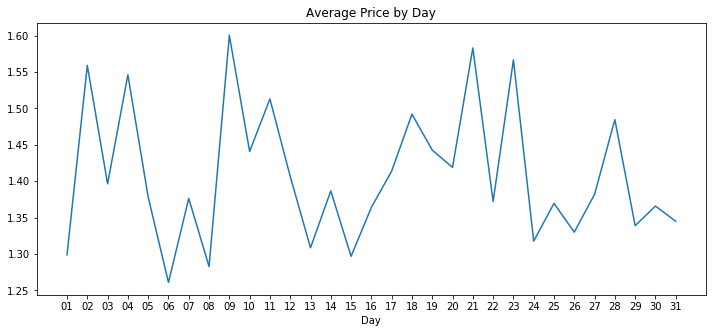

In [106]:
# Avokado Fiyatlarının Günlere Göre Değişimleri

dategroup = df.groupby('Day').mean()
fig, ax = plt.subplots(figsize = (12,5))
ax.xaxis.set(ticks = range(0,31))
dategroup['AveragePrice'].plot(x= df.Day)
plt.title('Average Price by Day');

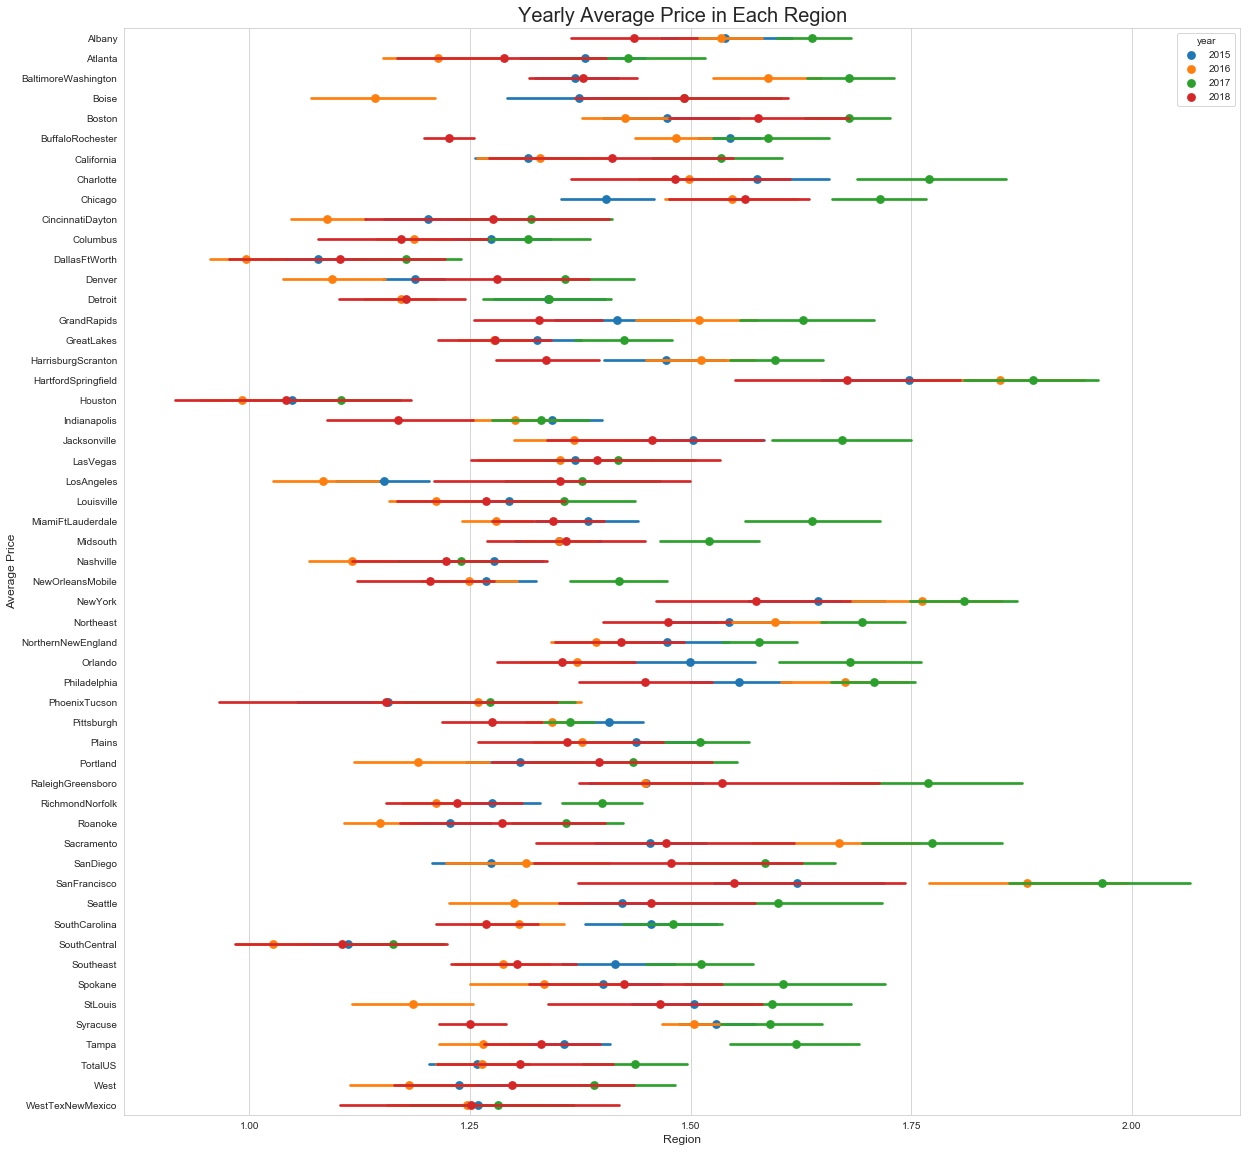

In [109]:
# Şehirlere Göre Yıllık Averaj Avokado Fiyatları

plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20});

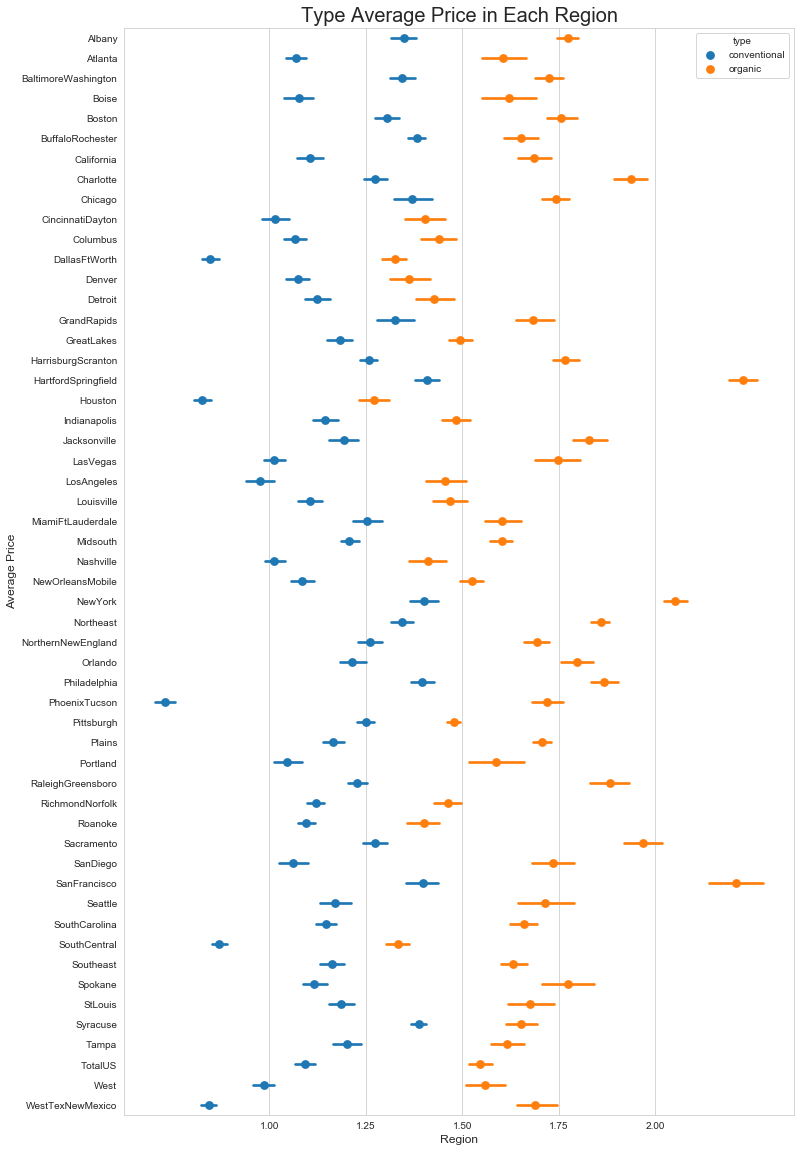

In [110]:
# Şehirlerde Tiplere Göre Averaj Avokado Satış Fiyatları

plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20});

### Veri Setindeki tiplerin dağılımı

conventional    9126
organic         9123
Name: type, dtype: int64


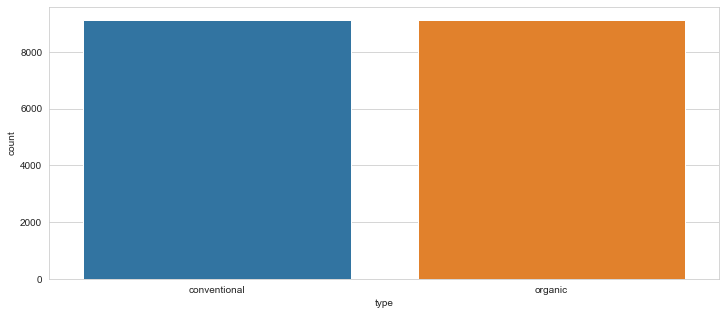

In [112]:
print(df['type'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(df['type'])
plt.show();

In [114]:
from fbprophet import Prophet

dff = df.loc[:, ["Date","AveragePrice"]]

In [115]:
dff.head()

,Date,AveragePrice
0,2015-01-04,1.33
1,2015-01-04,1.35
2,2015-01-04,0.93
3,2015-01-04,1.08
4,2015-01-04,1.28


In [118]:
dff['Date'] = pd.DatetimeIndex(dff['Date'])
dff.dtypes

Date            datetime64[ns]
AveragePrice           float64
dtype: object

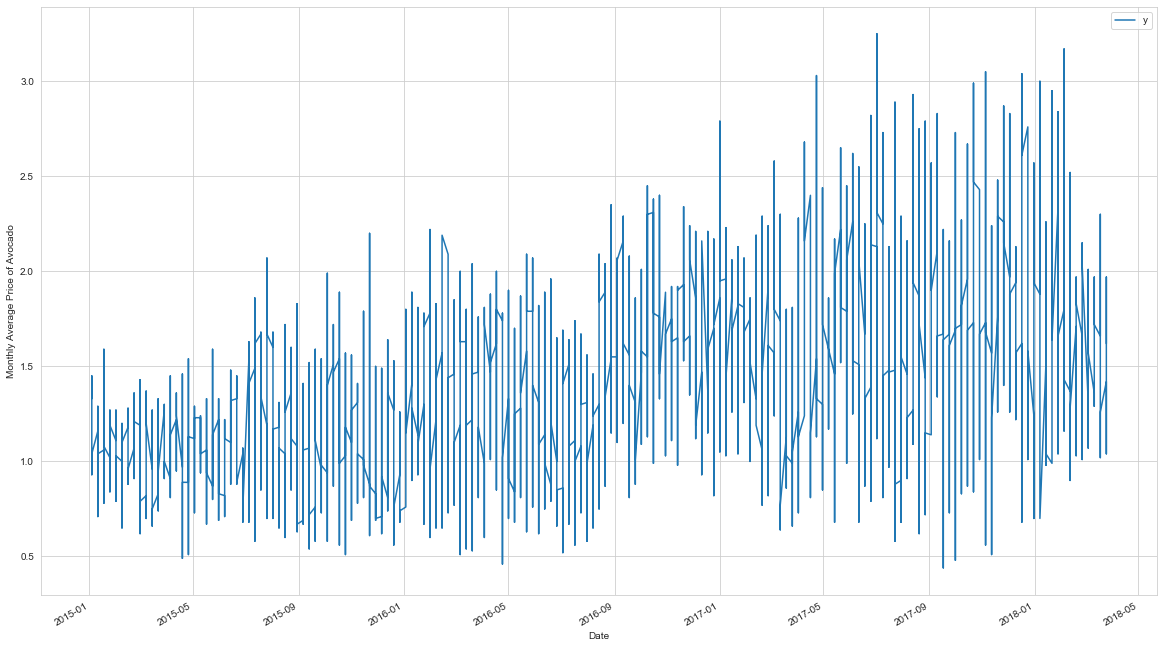

In [119]:
dff = dff.rename(columns={'Date': 'ds',
                        'AveragePrice': 'y'})

ax = dff.set_index('ds').plot(figsize=(20, 12))
ax.set_ylabel('Monthly Average Price of Avocado')
ax.set_xlabel('Date')
plt.show();

In [120]:
# Görselleştirmeden sonra prophet modelinin konfigürasyonunu yapalım.

my_model = Prophet()
my_model.fit(dff)

future_dates = my_model.make_future_dataframe(periods=900)
forecast =my_model.predict(future_dates)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


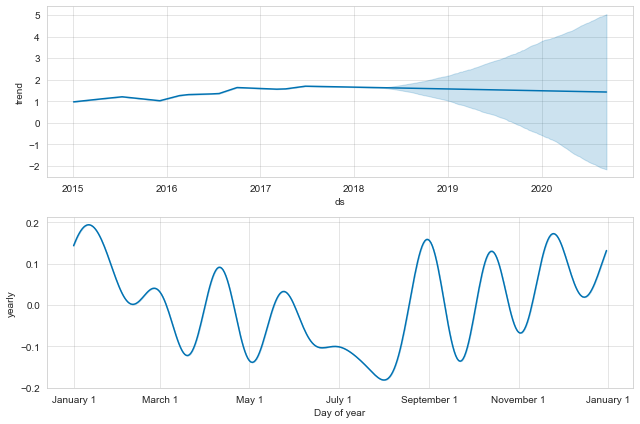

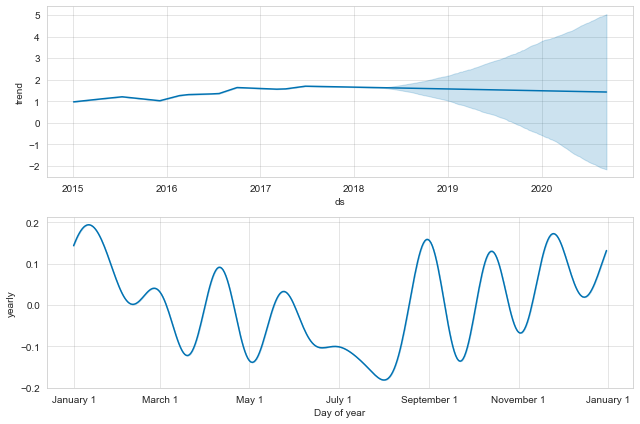

In [121]:
#Modeli çağırdıktan sonra, artık ilk forecast’ımızı yapmaya hazırız.

fig2 = my_model.plot_components(forecast)
fig2

Red = Predicted Values, Blue = Base Values


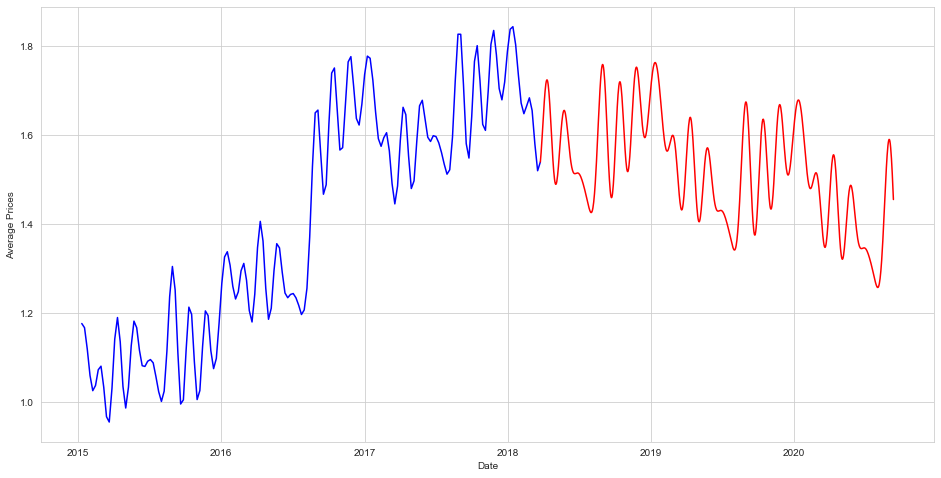

In [123]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2018-03-24") & (forecastnew['ds'] <= "2020-09-10")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2015-01-04") & (forecastnew['ds'] <= "2018-03-25")
forecastnew = forecastnew.loc[mask]
 

# Sınırlandırdıktan sonra artık görselleştirmeye hazırız. Bakalım elimizde neler var.


fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('Average Prices')
ax1.set_xlabel('Date');
print("Red = Predicted Values, Blue = Base Values")